# Practice Exercise on Convolutional Neural Networks (CNN)

Welcome to the Practice Exercise on Convolutional Neural Networks (CNN). In this exercise, we will focus on an image classification task where the goal is to predict whether an image contains a cat or a dog. We will work with a dataset of labeled images and build, train, and evaluate a CNN model. This practice will allow you to apply your understanding of CNNs to achieve high accuracy in image classification.

---

## Dataset Overview

### **Dataset Name:** Cats and Dogs Image Dataset

### **Description:**  
The dataset contains images of cats and dogs labeled for classification purposes. Each image belongs to one of the two classes: 'Cat' or 'Dog'. The goal is to classify the images correctly based on the content (i.e., whether the image is of a cat or a dog). The dataset is often used to test image classification models.

### **Features:**
There are two main folders which are:
- `Cat`: Images labeled as containing a cat.
- `Dog`: Images labeled as containing a dog.

### **Target Variable:**
- The goal is to predict whether an image contains a cat or a dog.


## Data Loading and Preprocessing


We will start by loading the dataset and preprocessing the images. This includes:
- Resizing images .
- Normalizing pixel values.

Add more if needed!


In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"majdalotaibi","key":"8b788d2d31ab0efc12b7bbc5bf75bf5b"}'}

In [2]:
!pip install -U opendatasets -q
import opendatasets
opendatasets.download("https://www.kaggle.com/c/dogs-vs-cats/data")

100%|██████████| 812M/812M [00:46<00:00, 18.2MB/s]



Extracting archive ./dogs-vs-cats/dogs-vs-cats.zip to ./dogs-vs-cats


In [3]:
!apt-get install unzip
!unzip /content/dogs-vs-cats/train.zip -d /content/dogs-vs-cats/train

Streaming output truncated to the last 5000 lines.
  inflating: /content/dogs-vs-cats/train/train/dog.5499.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.55.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.550.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5500.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5501.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5502.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5503.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5504.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5505.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5506.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5507.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5508.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5509.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.551.jpg  
  inflating: /content/dogs-vs-cats/train/train/dog.5510.jpg  
  inflating: /content/d

In [4]:
!apt-get install unzip
!unzip /content/dogs-vs-cats/test1.zip -d /content/dogs-vs-cats/test1

Streaming output truncated to the last 5000 lines.
  inflating: /content/dogs-vs-cats/test1/test1/5499.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/55.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/550.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5500.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5501.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5502.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5503.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5504.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5505.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5506.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5507.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5508.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5509.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/551.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5510.jpg  
  inflating: /content/dogs-vs-cats/test1/test1/5511.jpg  
  inflating: /content/dog

In [5]:
train_dir = '/content/dogs-vs-cats/train/train'
test_dir = '/content/dogs-vs-cats/test1/test1'

In [6]:
import os
file_names_train = os.listdir(train_dir)
print('There are {} number of images in Train directory.'.format(len(file_names_train)))

file_names_test = os.listdir(test_dir)
print('There are {} number of images in Test directory.'.format(len(file_names_test)))

There are 25000 number of images in Train directory.
There are 12500 number of images in Test directory.


In [7]:
import pandas as pd

In [8]:
def to_dataframe(file_names_train):
    files, labels = list(), list()
    for file in file_names_train:
        files.append(file)
        labels.append(file[:3])
    df = pd.DataFrame({'filename':files, 'label':labels})
    return df

train_df = to_dataframe(file_names_train)

In [9]:
train_df.head()

filename label
0  cat.5842.jpg   cat
1  cat.7370.jpg   cat
2  cat.5159.jpg   cat
3  dog.5970.jpg   dog
4  cat.2093.jpg   cat

In [10]:
train_df.shape

(25000, 2)

data set label distribution:
 label
cat    12500
dog    12500
Name: count, dtype: int64


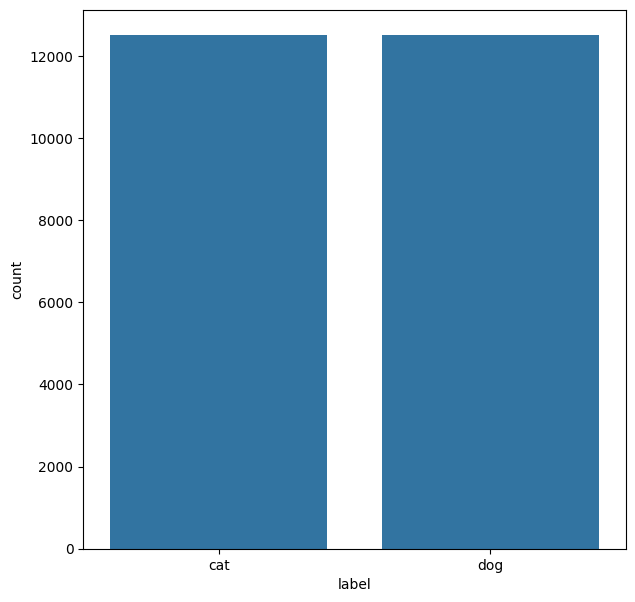

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
print('data set label distribution:\n',train_df['label'].value_counts())

plt.figure(figsize=(7,7))
sns.countplot(x = train_df['label'])
plt.show()

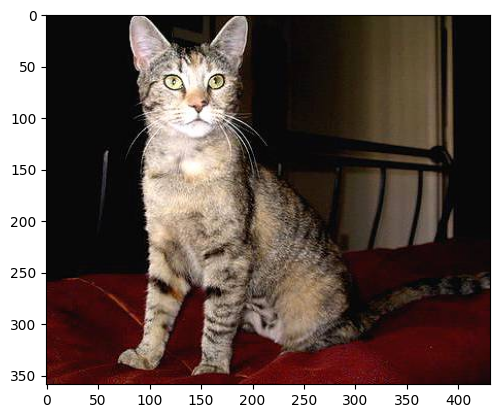

In [15]:
import matplotlib.image as img
im = img.imread('/content/dogs-vs-cats/train/train/cat.10000.jpg')
plt.imshow(im)
plt.show()

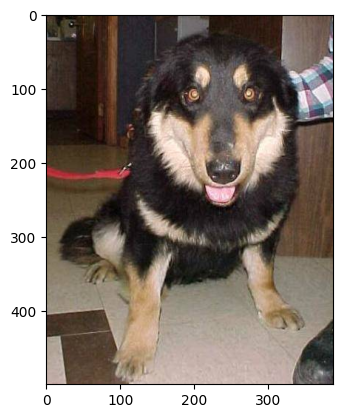

In [16]:
im = img.imread('/content/dogs-vs-cats/train/train/dog.11789.jpg')
plt.imshow(im)
plt.show()

In [21]:
# cat = [file for file in train_df if file[:3]=='cat']
# dog = [file for file in train_df if file[:3]=='dog']

In [24]:
# import numpy as np
# plt.figure(figsize=(15,7))
# for i, c in enumerate(np.random.randint(0,len(cat),4), start=1):
#     im = img.imread('/content/dogs-vs-cats/train/train/'+cat[c])
#     print(im.shape)
#     plt.subplot(2,2,i)
#     plt.imshow(im)
# plt.show()

In [26]:
# plt.figure(figsize=(15,7))
# for i, c in enumerate(np.random.randint(0,len(dog),4), start=1):
#     im = img.imread('/content/dogs-vs-cats/train/train/'+dog[c])
#     plt.subplot(2,2,i)
#     print(im.shape)
#     plt.imshow(im)
# plt.show()

 The photos have different shapes and sizes.

## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%): This portion of the dataset is used to train the CNN model.
* Validation set (15%): This portion is used to validate the model during training, helping us tune hyperparameters and avoid overfitting.
* Test set (15%): This portion is used to evaluate the model after training, to check its generalization to unseen data.

In [27]:
# the dataset is already spliting to train and test just i wil split the train to vald
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_df, test_size=0.15, random_state=42)

In [28]:
train_df.shape

(21250, 2)

In [29]:
val_df.shape

(3750, 2)

train set distribution:
 label
cat    10712
dog    10538
Name: count, dtype: int64

valid set distribution:
 label
dog    1962
cat    1788
Name: count, dtype: int64



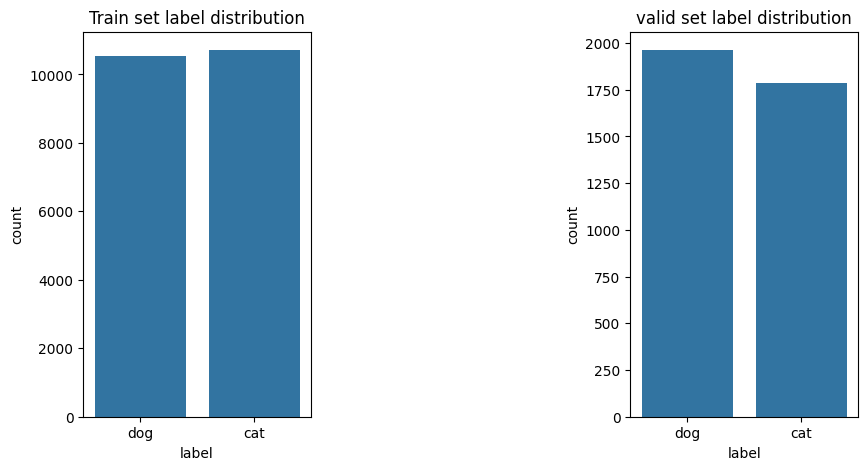

In [30]:
print('train set distribution:\n',train_df['label'].value_counts())
print('\nvalid set distribution:\n',val_df['label'].value_counts())
print()

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x=train_df['label'], order=['dog','cat'])
plt.title('Train set label distribution')

plt.subplot(1,3,3)
sns.countplot(x=val_df['label'], order=['dog','cat'])
plt.title('valid set label distribution')
plt.show()

# Data Augmentation

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
WIDTH, HEIGHT = 150, 150
batch_size = 32

In [32]:
train_datagenerator = ImageDataGenerator(rotation_range=15,
                                  rescale=1./255,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)

training_data = train_datagenerator.flow_from_dataframe(dataframe=train_df,
                                                        directory='/content/dogs-vs-cats/train/train',
                                                       x_col='filename',
                                                       y_col='label',
                                                       target_size=(WIDTH, HEIGHT),
                                                       class_mode='categorical',
                                                       batch_size=batch_size)

Found 21250 validated image filenames belonging to 2 classes.


In [33]:
training_data.class_indices

{'cat': 0, 'dog': 1}

In [34]:
training_data.filenames[:10]

['cat.3633.jpg',
 'cat.2316.jpg',
 'cat.8473.jpg',
 'cat.6356.jpg',
 'cat.1742.jpg',
 'dog.7798.jpg',
 'dog.11255.jpg',
 'dog.8215.jpg',
 'cat.3608.jpg',
 'cat.7939.jpg']

In [35]:
valid_datagenerator = ImageDataGenerator(rescale=1./255)

validation_data = valid_datagenerator.flow_from_dataframe(dataframe=val_df,
                                                         directory='/content/dogs-vs-cats/train/train',
                                                         x_col='filename',
                                                         y_col='label',
                                                         target_size=(WIDTH,HEIGHT),
                                                         class_mode='categorical',
                                                         batch_size=batch_size)

Found 3750 validated image filenames belonging to 2 classes.


## Building the CNN Model


Now, we will define our CNN architecture using `tensorflow.keras`. The architecture will consist of:
- Convolutional layers followed by max-pooling layers
- Flatten layer
- Dense layers
- Output layer


In [36]:
train_df.shape[1]

2

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the Model


Train the CNN model using the `fit` function. We will use the training and validation we created earlier.

Fill in the code to train the model for a specified number of epochs.


In [38]:
history = model.fit(training_data, epochs=10, validation_data=validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


665/665 ━━━━━━━━━━━━━━━━━━━━ 160s 230ms/step - accuracy: 0.5754 - loss: 0.7580 - val_accuracy: 0.7203 - val_loss: 0.5652
Epoch 2/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 188s 216ms/step - accuracy: 0.7145 - loss: 0.5603 - val_accuracy: 0.7760 - val_loss: 0.4627
Epoch 3/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 203s 217ms/step - accuracy: 0.7700 - loss: 0.4833 - val_accuracy: 0.8197 - val_loss: 0.4055
Epoch 4/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 202s 217ms/step - accuracy: 0.7917 - loss: 0.4498 - val_accuracy: 0.8283 - val_loss: 0.3877
Epoch 5/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 202s 217ms/step - accuracy: 0.8072 - loss: 0.4135 - val_accuracy: 0.8280 - val_loss: 0.3819
Epoch 6/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 203s 218ms/step - accuracy: 0.8242 - loss: 0.3900 - val_accuracy: 0.8528 - val_loss: 0.3367
Epoch 7/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 206s 224ms/step - accuracy: 0.8398 - loss: 0.3599 - val_accuracy: 0.8731 - val_loss: 0.2998
Epoch 8/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 196s 216ms/step - accuracy: 0.8537 - loss: 0.33

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

## Evaluating the Model


After training, evaluate the model on the validation data to check its performance.


In [41]:
model.save('model.h5')

In [42]:
import tensorflow as tf
from tensorflow import keras
model1 = keras.models.load_model('/content/model.h5')

In [43]:
test_loss, test_acc = model1.evaluate(validation_data, steps=len(validation_data), verbose=1)
print('Loss: %.3f' % (test_loss))
print('Accuracy: %.3f' % (test_acc * 100.0))

118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.8829 - loss: 0.2719
Loss: 0.279
Accuracy: 88.187


## Testing with New Images

Finally, let's test the model with some new images. Preprocess the images and use the trained model to predict whether the image is of a cat or a dog.


In [44]:
sampleSubmission = pd.read_csv('/content/dogs-vs-cats/sampleSubmission.csv')
test_df = sampleSubmission.copy()

In [46]:
test_df.shape

(12500, 2)

In [47]:
test_df.head()

id  label
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0

In [48]:
test_df['id'] = test_df['id'].apply(lambda x : str(x)+'.jpg')

In [49]:
test_df.head()

id  label
0  1.jpg      0
1  2.jpg      0
2  3.jpg      0
3  4.jpg      0
4  5.jpg      0

In [57]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(test_df,
                                                "/content/dogs-vs-cats/test1/test1/",
                                                x_col='id',
                                                y_col=None,
                                                class_mode=None,
                                                target_size=(WIDTH,HEIGHT),
                                                batch_size=batch_size,
                                                shuffle=False)

Found 12500 validated image filenames.


In [59]:
predict = model1.predict(test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step


In [60]:
sampleSubmission['label'] = np.argmax(predict, axis=-1)
sampleSubmission.to_csv('submission.csv', index=False)

In [61]:
df = pd.read_csv('/content/submission.csv')
df.head()

id  label
0   1      1
1   2      1
2   3      1
3   4      1
4   5      0

In [62]:
test_df['label'] = sampleSubmission['label'].replace({ 1: 'dog', 0: 'cat' })

In [63]:
test_df.head()

id label
0  1.jpg   dog
1  2.jpg   dog
2  3.jpg   dog
3  4.jpg   dog
4  5.jpg   cat

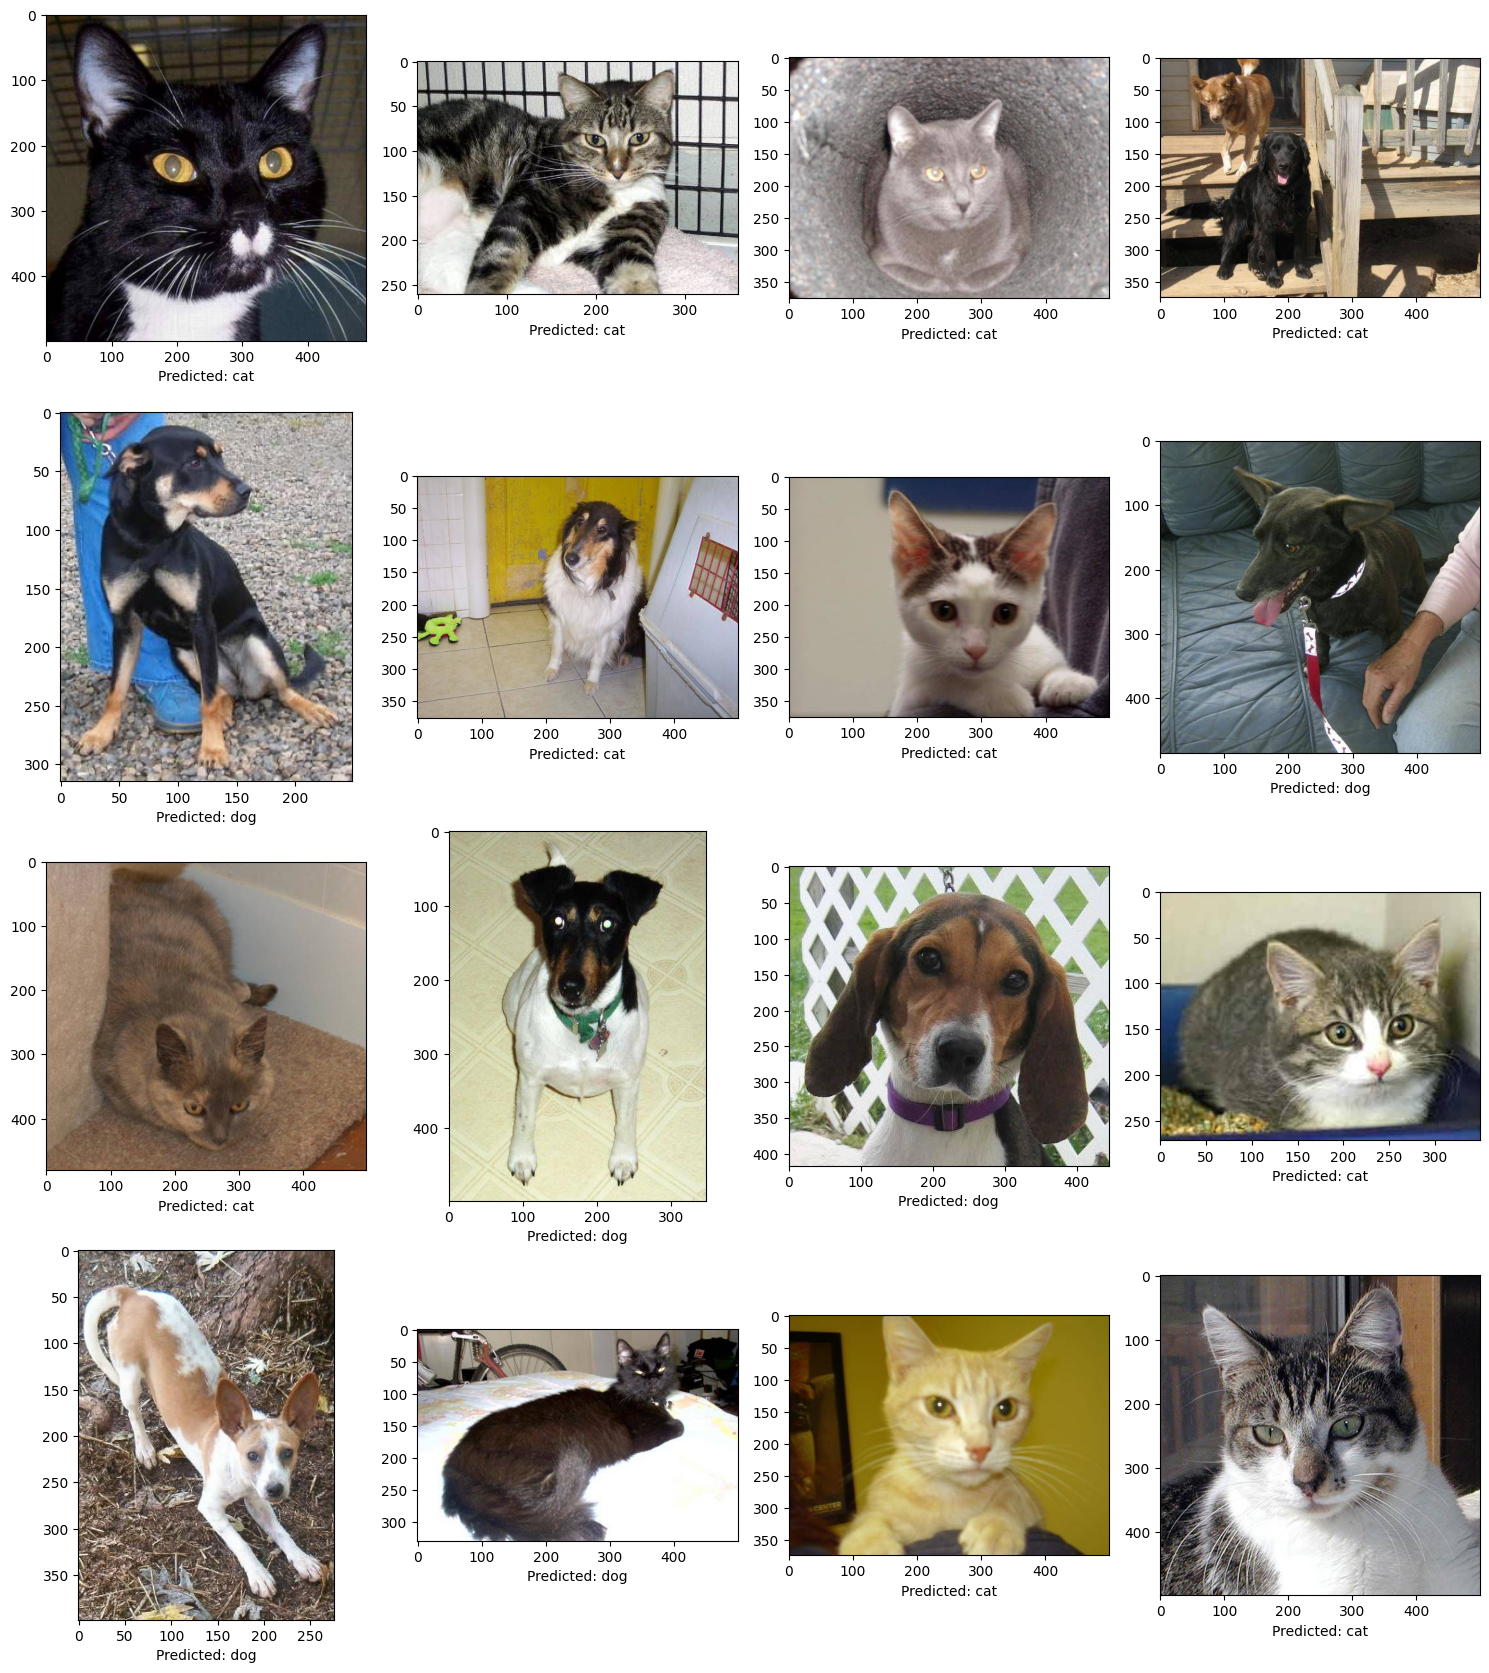

In [65]:
sample_test = test_df.values[np.random.randint(0, len(test_df), 16)]
sample_test
plt.figure(figsize=(15, 17))
for index, row in enumerate(sample_test):
    filename = row[0]
    category = row[1]
    image = img.imread("/content/dogs-vs-cats/test1/test1/"+filename)
    plt.subplot(4, 4, index+1)
    plt.imshow(image)
    plt.xlabel('Predicted: ' + "{}".format(category) )
plt.tight_layout()
plt.show()